> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.9 - Visualização de Dados

## Exercícios
Vamos trabalhar com as mesmas bases de dados do exercício de Pandas. Aqui estão os links caso você queira baixar novamente, mas recomendo trabalhar com o `wc_formatado.csv` que exportamos na questão Q2 do exercício anterior.

* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1930_2022.csv
* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1991_2023.csv

Para relembrar, essas são as colunas do dataframe:
```
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time_1             1312 non-null   string        
 1   time_2             1312 non-null   string        
 2   gols_1             1312 non-null   int64         
 3   gols_2             1312 non-null   int64         
 4   data               1312 non-null   datetime64[ns]
 5   ano                1312 non-null   int64         
 6   país_sede          1312 non-null   string        
 7   comparecimento     1312 non-null   int64         
 8   resultado          1312 non-null   string        
 9   rodada             1312 non-null   category      
 10  gols_1_detalhes    970 non-null    string        
 11  gols_2_detalhes    771 non-null    string        
 12  gols_1_contra      57 non-null     string        
 13  gols_2_contra      30 non-null     string        
 14  gols_1_penalti     170 non-null    string        
 15  gols_2_penalti     119 non-null    string        
 16  cartao_vermelho_1  59 non-null     string        
 17  cartao_vermelho_2  65 non-null     string        
 18  cartao_amarelo_1   834 non-null    string        
 19  cartao_amarelo_2   857 non-null    string        
 20  copa               1312 non-null   string
```

#### Q1.
Realize todos os imports necessários para executar as três bibliotecas de visualização que conhecemos:
* Matplotlib (lembre-se do comando mágico)
* Seaborn
* Plotly

Para cada uma delas, altere o tema padrão de visualização.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio


plt.style.use('ggplot')

sns.set_theme(style="darkgrid")

pio.templates.default = "plotly_dark"

#### Q2.
Sobre os dados de copa do mundo, qual a distribuição de público presente nos jogos? Isso pode ser respondido com um histograma com os dados da coluna `comparecimento`.  

Lembre-se que alguns jogos estavam com público 0 incorretamente, que tal remover essas ocorrências para não atrapalhar sua visualzação?

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

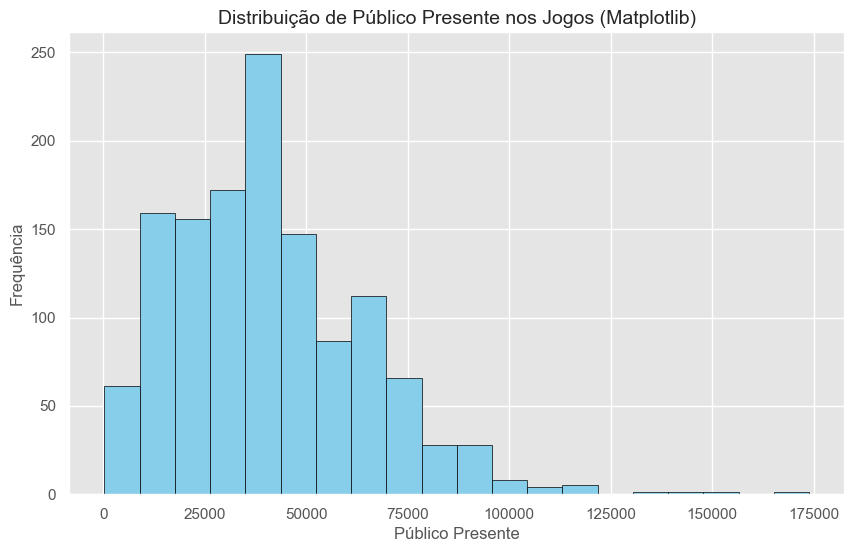

In [ ]:
df = pd.read_csv('wc_formatado.csv')
df = df[df['comparecimento'] > 0]

#### Solução com matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.hist(df['comparecimento'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição de Público Presente nos Jogos (Matplotlib)', fontsize=14)
plt.xlabel('Público Presente', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.show()

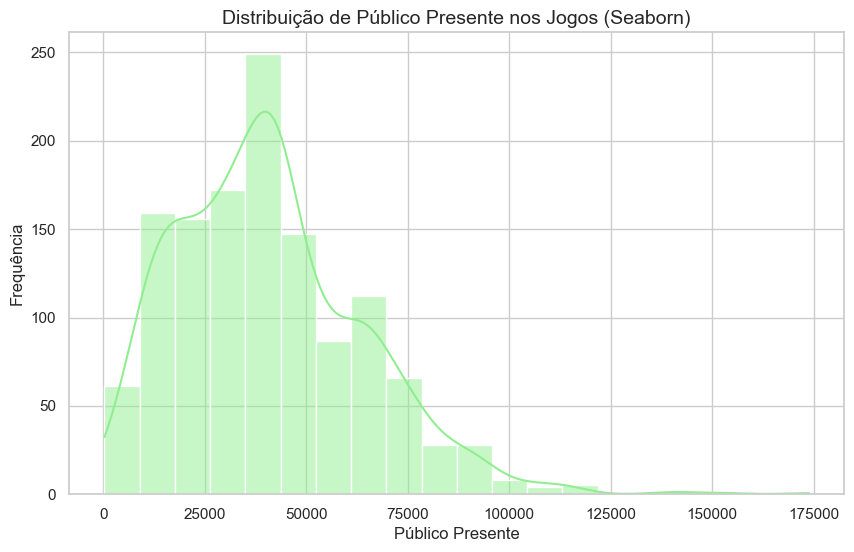

In [ ]:
df = pd.read_csv('wc_formatado.csv')
df = df[df['comparecimento'] > 0]

#### solução com seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['comparecimento'], bins=20, color='lightgreen', kde=True)
plt.title('Distribuição de Público Presente nos Jogos (Seaborn)', fontsize=14)
plt.xlabel('Público Presente', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.show()

In [ ]:
df = pd.read_csv('wc_formatado.csv')
df = df[df['comparecimento'] > 0]

#### solução com plotly
import plotly.express as px

fig = px.histogram(df,
                   x='comparecimento',
                   nbins=20,
                   title='Distribuição de Público Presente nos Jogos (Plotly)',
                   labels={'comparecimento': 'Público Presente', 'count': 'Frequência'},
                   color_discrete_sequence=['orange'])

fig.update_layout(
    xaxis_title='Público Presente',
    yaxis_title='Frequência',
    template='plotly_white',
    bargap=0.1
)

fig.show()

#### Q3.

Apresente um gráfico de dispersão (scatter) dos atributos `gols_1` e `gols_2`. Isso representa a relação entre gols feitos e gols tomados por jogo. Há alguma relação interessante entre esses atributos?

Para facilitar a visualização dos dados (já que tem muitos placares repetidos), aplique uma leve distorção aos dados para que cada ponto esteja deslocado aleatoriamente de seu valor original. Código apresentado a seguir
```python
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))
```

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

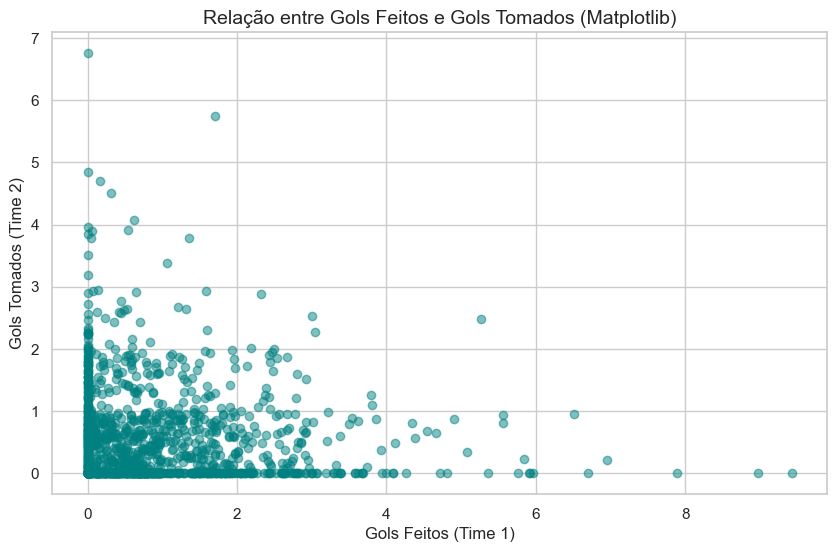

In [ ]:
import pandas as pd
import numpy as np
wc = pd.read_csv('wc_formatado.csv')
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc), 2))

#### solução com matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(gols['gols_1'], gols['gols_2'], alpha=0.5, color='teal')
plt.title('Relação entre Gols Feitos e Gols Tomados (Matplotlib)', fontsize=14)
plt.xlabel('Gols Feitos (Time 1)', fontsize=12)
plt.ylabel('Gols Tomados (Time 2)', fontsize=12)

plt.show()


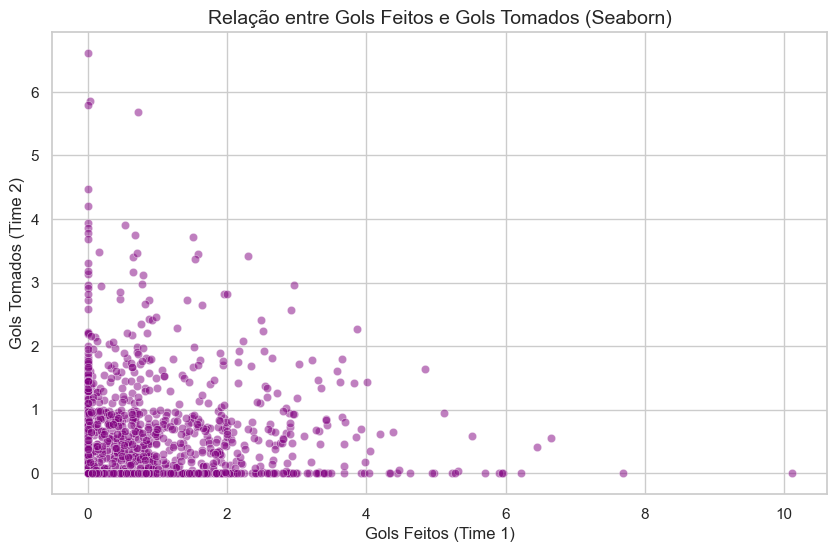

In [ ]:
import pandas as pd
import numpy as np
wc = pd.read_csv('wc_formatado.csv')
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc), 2))

#### solução com seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=gols['gols_1'], y=gols['gols_2'], color='purple', alpha=0.5)
plt.title('Relação entre Gols Feitos e Gols Tomados (Seaborn)', fontsize=14)
plt.xlabel('Gols Feitos (Time 1)', fontsize=12)
plt.ylabel('Gols Tomados (Time 2)', fontsize=12)

plt.show()

In [ ]:
import pandas as pd
import numpy as np
wc = pd.read_csv('wc_formatado.csv')
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc), 2))

#### solução com plotly
import plotly.express as px

fig = px.scatter(x=gols['gols_1'], y=gols['gols_2'],
                 title='Relação entre Gols Feitos e Gols Tomados (Plotly)',
                 labels={'gols_1': 'Gols Feitos (Time 1)', 'gols_2': 'Gols Tomados (Time 2)'},
                 color_discrete_sequence=['orange'])

fig.update_layout(
    xaxis_title='Gols Feitos (Time 1)',
    yaxis_title='Gols Tomados (Time 2)',
    template='plotly_white'
)

fig.show()

#### Q4.

Apresente um gráfico de barras com o top 10 países que mais participaram de copas do mundo, onde no eixo x devem estar o nome dos países e no eixo y a contagem de participações. Você deve separar a contagem de participações em copas femininas e masculinas, empilhando as barras de cada informação.

No exemplo de barras empilhadas da galeria do matplotlib, imagine que a parte azul são as participações do país em copas masculinas, e em laranja as participações femininas:
* https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos:
* título
* rótulos de dimensão.
* legenda

                        Masculina  Feminina
país_sede                                  
Argentina                       0         0
Australia, New Zealand          0         0
Brazil                          0         0
Canada                          0         0
Chile                           0         0
China PR                        0         0
England                         0         0
France                          0         0
Germany                         0         0
Italy                           0         0


<Figure size 1000x600 with 0 Axes>

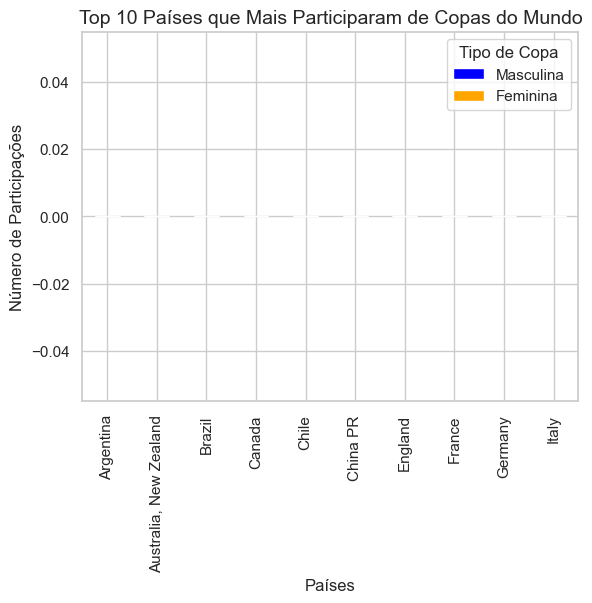

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('wc_formatado.csv')

#### Solução com matplotlib
df['copa'] = df['copa'].astype('category')
df['país_sede'] = df['país_sede'].astype('category')
df_masculino = df[df['copa'] == 'masculina']
df_feminino = df[df['copa'] == 'feminina']

participacoes_masculinas = df_masculino['país_sede'].value_counts().head(10)
participacoes_femininas = df_feminino['país_sede'].value_counts().reindex(participacoes_masculinas.index, fill_value=0)
participacoes = pd.DataFrame({
    'Masculina': participacoes_masculinas,
    'Feminina': participacoes_femininas
})

plt.figure(figsize=(10, 6))
participacoes.plot(kind='bar', stacked=True, color=['blue', 'orange'])

plt.title('Top 10 Países que Mais Participaram de Copas do Mundo', fontsize=14)
plt.xlabel('Países', fontsize=12)
plt.ylabel('Número de Participações', fontsize=12)
plt.legend(title='Tipo de Copa', labels=['Masculina', 'Feminina'])

plt.show()


<Figure size 1000x600 with 0 Axes>

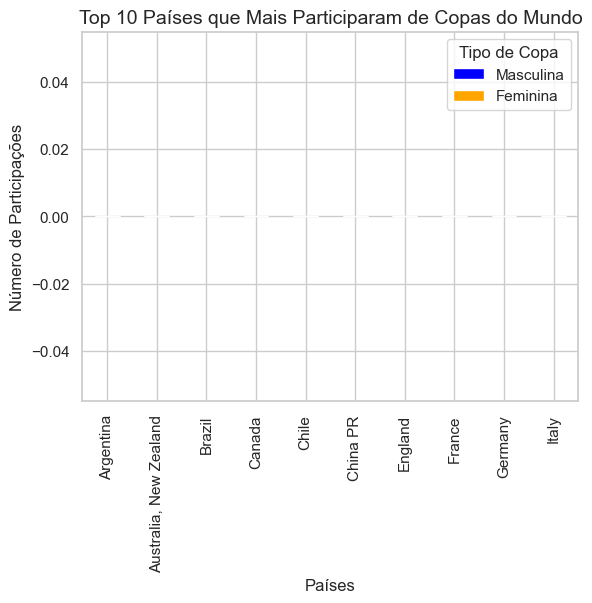

In [ ]:
#### solução com seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
participacoes.plot(kind='bar', stacked=True, color=['blue', 'orange'])

plt.title('Top 10 Países que Mais Participaram de Copas do Mundo', fontsize=14)
plt.xlabel('Países', fontsize=12)
plt.ylabel('Número de Participações', fontsize=12)
plt.legend(title='Tipo de Copa', labels=['Masculina', 'Feminina'])

plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

#### solução com plotly
participacoes = pd.DataFrame({
    'País': participacoes.index,
    'Masculina': participacoes['Masculina'],
    'Feminina': participacoes['Feminina']
})

participacoes_melted = participacoes.melt(id_vars='País', value_vars=['Masculina', 'Feminina'],
                                          var_name='Tipo de Copa', value_name='Número de Participações')

fig = px.bar(participacoes_melted,
             x='País',
             y='Número de Participações',
             color='Tipo de Copa',
             title='Top 10 Países que Mais Participaram de Copas do Mundo',
             labels={'País': 'Países', 'Número de Participações': 'Número de Participações'},
             color_discrete_sequence=['blue', 'orange'])

fig.update_layout(
    xaxis_title='Países',
    yaxis_title='Número de Participações',
    barmode='stack',
    template='plotly_white',
    legend_title='Tipo de Copa'
)

fig.show()



#### Q5.

Vamos fazer um compilado com as estatísticas históricas de copas do mundo!

Com a biblioteca de sua preferência você deve criar 4 subplots organizados em um grid de 2 linhas e 2 colunas. Eles devem conter os seguintes gráficos:
* Linha 1, coluna 1: Gráfico de barras com a quantidade de jogos que aconteceram por ano
* Linha 1, coluna 2: Gráfico de área (referências a seguir) com o total de gols por ano, separando as informações de `gols_1` e `gols_2` para distinguir gols em casa e do time visitante.
* Linha 2, coluna 1: Gráfico de área com o total de cartões por ano, separando as informações de cartões amarelos e cartões vermelhos, mas agregando cartões do time 1 ou time 2. Ou seja, uma área com `cartao_amarelo_1 + cartao_amarelo_2` e outra área com `cartao_vermelho_1 + cartao_vermelho_2`.
* Linha 2, coluna 2: Gráfico de barras com o total de gols contra por ano, somando `gols_contra_1` e `gols_contra_2`.

Referências sobre gráfico de área
* Matplotlib: https://matplotlib.org/stable/gallery/lines_bars_and_markers/stackplot_demo.html#sphx-glr-gallery-lines-bars-and-markers-stackplot-demo-py
* Pandas + Matplotlib: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html
* Seaborn: https://seaborn.pydata.org/generated/seaborn.objects.Area.html
* Plotly: https://plotly.com/python/filled-area-plots/

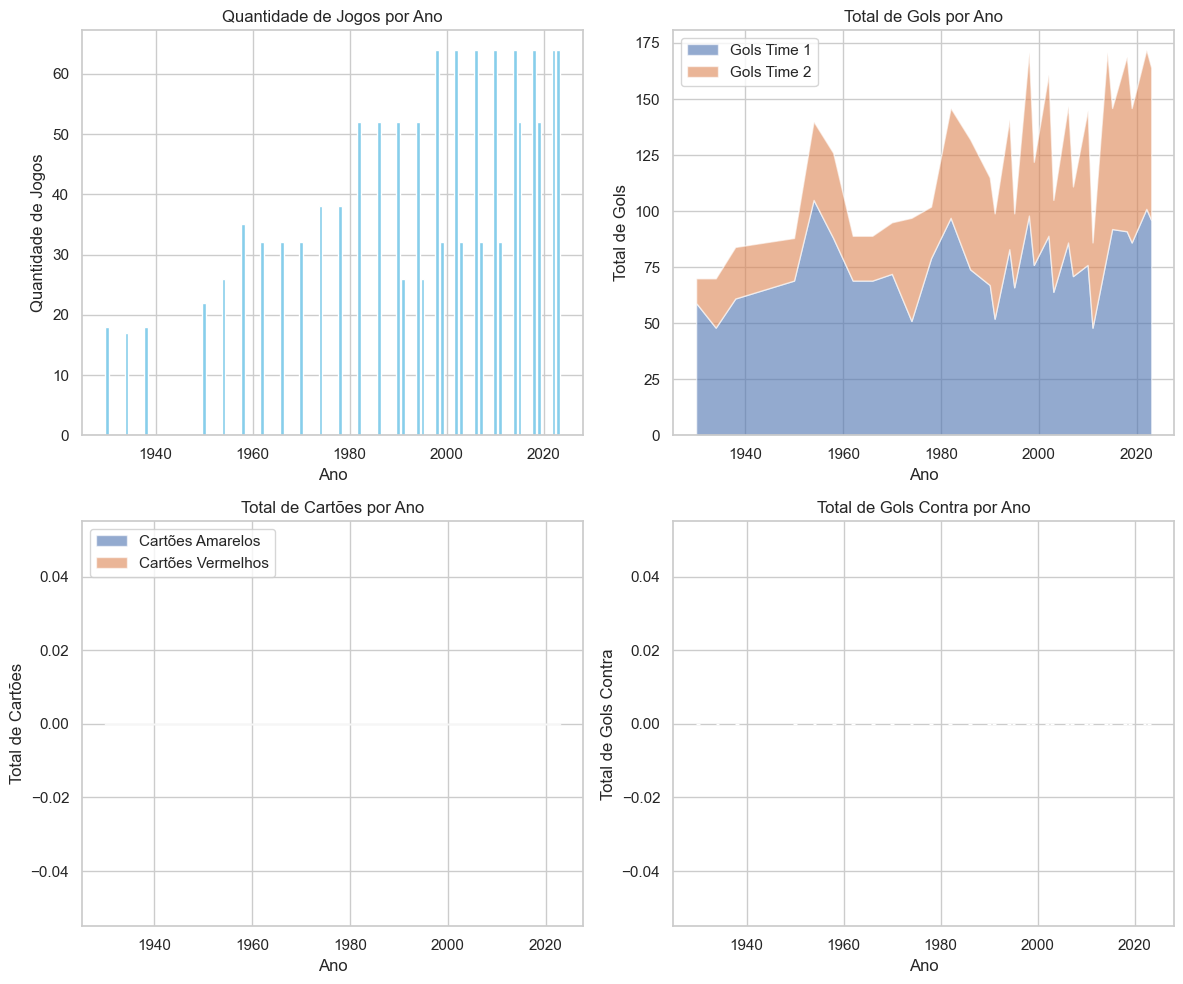

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('wc_formatado.csv')
df['cartao_amarelo_1'] = pd.to_numeric(df['cartao_amarelo_1'], errors='coerce').fillna(0)
df['cartao_amarelo_2'] = pd.to_numeric(df['cartao_amarelo_2'], errors='coerce').fillna(0)
df['cartao_vermelho_1'] = pd.to_numeric(df['cartao_vermelho_1'], errors='coerce').fillna(0)
df['cartao_vermelho_2'] = pd.to_numeric(df['cartao_vermelho_2'], errors='coerce').fillna(0)
df['gols_1_contra'] = pd.to_numeric(df['gols_1_contra'], errors='coerce').fillna(0)
df['gols_2_contra'] = pd.to_numeric(df['gols_2_contra'], errors='coerce').fillna(0)

jogos_por_ano = df.groupby('ano').size()
gols_por_ano = df.groupby('ano')[['gols_1', 'gols_2']].sum()
cartoes_por_ano = df.groupby('ano')[['cartao_amarelo_1', 'cartao_amarelo_2', 'cartao_vermelho_1', 'cartao_vermelho_2']].sum()
gols_contra_por_ano = df.groupby('ano')[['gols_1_contra', 'gols_2_contra']].sum()

cartoes_por_ano = cartoes_por_ano.fillna(0)
gols_contra_por_ano = gols_contra_por_ano.fillna(0)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].bar(jogos_por_ano.index, jogos_por_ano.values, color='skyblue')
axes[0, 0].set_title('Quantidade de Jogos por Ano')
axes[0, 0].set_xlabel('Ano')
axes[0, 0].set_ylabel('Quantidade de Jogos')

axes[0, 1].stackplot(gols_por_ano.index, gols_por_ano['gols_1'], gols_por_ano['gols_2'],
                     labels=['Gols Time 1', 'Gols Time 2'], alpha=0.6)
axes[0, 1].set_title('Total de Gols por Ano')
axes[0, 1].set_xlabel('Ano')
axes[0, 1].set_ylabel('Total de Gols')
axes[0, 1].legend(loc='upper left')

cartao_amarelo_total = cartoes_por_ano['cartao_amarelo_1'] + cartoes_por_ano['cartao_amarelo_2']
cartao_vermelho_total = cartoes_por_ano['cartao_vermelho_1'] + cartoes_por_ano['cartao_vermelho_2']

axes[1, 0].stackplot(cartoes_por_ano.index, cartao_amarelo_total, cartao_vermelho_total,
                     labels=['Cartões Amarelos', 'Cartões Vermelhos'], alpha=0.6)
axes[1, 0].set_title('Total de Cartões por Ano')
axes[1, 0].set_xlabel('Ano')
axes[1, 0].set_ylabel('Total de Cartões')
axes[1, 0].legend(loc='upper left')

gols_contra_total = gols_contra_por_ano['gols_1_contra'] + gols_contra_por_ano['gols_2_contra']
axes[1, 1].bar(gols_contra_por_ano.index, gols_contra_total, color='salmon')
axes[1, 1].set_title('Total de Gols Contra por Ano')
axes[1, 1].set_xlabel('Ano')
axes[1, 1].set_ylabel('Total de Gols Contra')

plt.tight_layout()
plt.show()